# MLP (Multilayer Perceptron) vs. CNN (Convolutional Neural Network) 

## Introduction

AI models, including both MLPs and CNNs, can effectively classify and recognize different objects. You may already know that they can classify handwritten digits into classes. Actually, they can identify more than you can think of. 

Keras provides multiple coding paradigms and API patterns for some functions.

Nonetheless,
they provided many official code examples, where many alternative paradigms and underdocumented API shorthands are demonstrated:
* [Simple MNIST convnet](https://keras.io/examples/vision/mnist_convnet/) (MNIST is another image dataset on handwritten digits)
* [Basic image classification](https://www.tensorflow.org/tutorials/keras/classification)
* [Image classification](https://keras.io/examples/vision/image_classification_from_scratch/)
* [Intro to Keras for engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/)


In [ ]:
# Provided: notebook bootstrapping
# Keras Models
import tensorflow as tf
import keras 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.datasets import fashion_mnist

# Aditional Libs
import numpy as np
import os
import matplotlib.pyplot as plt


## Introduction to the Dataset

The dataset is [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


### Loading the dataset

Keras has a built-in API for loading some existing [famous baseline dataset](https://keras.io/api/datasets/). Luckily, Fashion-MNIST is one of them. So we directly load the dataset with `keras.datasets.fashion_mnist.load_data` and we will get:


* `X_train` has 60000 training images, size of each image should be `(28,28)`
* `y_train` is a list of length 60000 containing the ground-truth label of those images, each being an integer in `[0, 9]`.
* Similar for `X_test` & `y_test`. But the size should be 10000 instead of 60000.

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Shape of X_train:{}".format(X_train.shape))
print("Shape of y_train:{}".format(y_train.shape))
print("Shape of X_test:{}".format(X_test.shape))
print("Shape of y_test:{}".format(y_test.shape))

Shape of X_train:(60000, 28, 28)
Shape of y_train:(60000,)
Shape of X_test:(10000, 28, 28)
Shape of y_test:(10000,)


### Data preprocessing for MLP
MLPs (Multilayer Perceptron) use one perceptron for each input (e.g. pixel in an image). The input of MLP should be 1D rather than 2D.

Additionally, the data range of original X_train and X_test spread from 0 to 255. So it requires normalizing and reshaping it to 1D array for training neural network.

Note that each label is an integer in $[0, 9]$.
It follows that each element of `y_train` and `y_test` is 1D.


In [ ]:

X_train = X_train / 255.
X_train = X_train.reshape([-1, 28*28])
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)
y_train_bak = y_train

X_test = X_test / 255.
X_test = X_test.reshape([-1, 28*28])
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)
y_test_bak = y_test

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Finish Normalizing and Reshaping")

Finish Normalizing and Reshaping


### Sample data visualization

Check the dataset manually is important, one way to do so is to plot and visualize the images directly. In this section, we'll visualize each label of image in a 5x5 matrix.

Y25 randomly selected images from the dataset. You can repeatedly run this code section and the visualized samples are different every time.

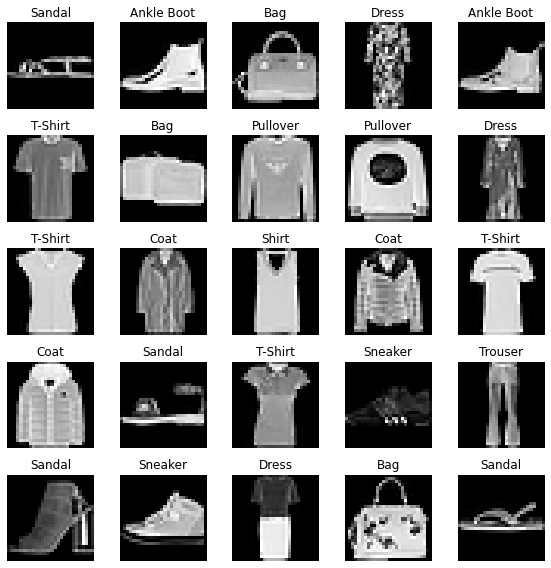

In [ ]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = labels_map[y_train_bak[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


*   In the input layer, you are expected to implement a Dense layer with 256 nodes, and it accepts 28x28-shaped(or 764) input. Since the shape of the image is 28x28, and 1D array converted from a 2D array will enter here. So you need to define input_shape here. Note that the input_shape argument has to be a tuple type.
*   Add [`Batch Normalization`](https://keras.io/api/layers/normalization_layers/batch_normalization/) layer. Batch Normalization can reduce the effect of Internal Covariate Shift, which would maintain the information distribution to be a normal distribution.
*   Add the ReLU activation function. 
*   Since this task is a multi-class classification, the Softmax activation function should be added at the end of the output layer.


In [ ]:

def build_mlp_model():

  model = keras.Sequential(name='mlp')

  model.add(Dense(units=256, input_dim=784))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.ReLU())
  model.add(Dense(units=10, activation='softmax'))

  return model

mlp_model = build_mlp_model()
mlp_model.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 204,554
Trainable params: 204,042
Non-trainable params: 512
_________________________________________________________________


## 1.2: Compile an MLP Model

In [ ]:

def compile_mlp_model(mlp_model):

  mlp_optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
  mlp_loss=tf.keras.losses.CategoricalCrossentropy()
  mlp_metrics=['accuracy']

  mlp_model.compile(optimizer=mlp_optimizer, loss=mlp_loss, metrics=mlp_metrics)
  return mlp_model

mlp_model = compile_mlp_model(mlp_model)

# 1.3: Model Training


In [ ]:
# TODO: use model.fit() and input correct data, label, batch_size, epochs parameter

def train_model(model, train_epochs, bs, x_train, y_train):

    ### START YOUR CODE HERE
    return model.fit(x=x_train,y=y_train,epochs=train_epochs,batch_size=bs
      
    )
    ### END YOUR CODE HERE

mlp_history = train_model(model = mlp_model, train_epochs = 5, bs = 512, x_train = X_train, y_train = y_train)

Epoch 1/5
118/118 [==============================] - 5s 28ms/step - loss: 0.7321 - accuracy: 0.7743
Epoch 2/5
118/118 [==============================] - 4s 30ms/step - loss: 0.3997 - accuracy: 0.8554
Epoch 3/5
118/118 [==============================] - 3s 26ms/step - loss: 0.3619 - accuracy: 0.8677
Epoch 4/5
118/118 [==============================] - 3s 29ms/step - loss: 0.3339 - accuracy: 0.8780
Epoch 5/5
118/118 [==============================] - 3s 28ms/step - loss: 0.3233 - accuracy: 0.8803


## 1.4: Model Evaluation

Refer to [`model.evaluate`](https://keras.io/api/models/model_training_apis/#evaluate-method) documentation.
Implement a function that evaluates the model given `x_test` & `y_test` in a batch size of 64.


In [ ]:

def test_model(model, x_test, y_test):

  return model.evaluate(x=x_test,y=y_test,batch_size=64

   )

loss, acc = test_model(mlp_model, X_test, y_test)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

157/157 [==============================] - 1s 6ms/step - loss: 0.4168 - accuracy: 0.8569
test loss is 0.4167606830596924
test accuracy is 0.8568999767303467


##Visualization of MLP prediction

To check whether our MLP model can successfully identify and classify the clothes images. We randomly selected some samples in the test set and predicted them with our model. The correct prediction is marked in blue and the wrong prediction with ground truth is marked in red.

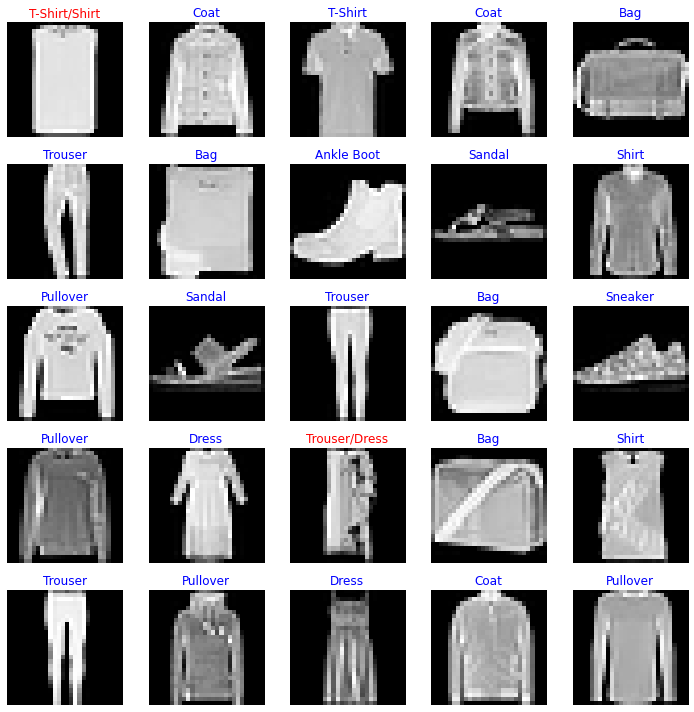

In [ ]:
test_batch_size = 25
batch_index = np.random.choice(len(X_test), size=test_batch_size, replace=False)

batch_xs = X_test[batch_index]
batch_ys = y_test_bak[batch_index]
y_pred_ = mlp_model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28), cmap='gray')
    p.axis('off')
plt.tight_layout()

## 2.1 Build a CNN model

In summary,
* A convolutional layer with 16 3*3 kernels, ReLU activation, and ["He uniform"](https://keras.io/api/layers/initializers/#heuniform-class) kernel initializer
* A 2*2 max pooling layer
* A flatten layer to squash the 3D data to 1D
* A dense layer with output dimension 100, relu activation, and ["He uniform"](https://keras.io/api/layers/initializers/#heuniform-class) kernel initializer
* A dense layer with output dimension 10 and softmax activation


In [ ]:

def build_cnn_model():

  model = keras.Sequential(name='cnn')

  model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1),kernel_initializer=tf.keras.initializers.HeUniform()))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(units=100, activation='relu',kernel_initializer=tf.keras.initializers.HeUniform()))
  model.add(Dense(units=10, activation='softmax'))
  return model

cnn_model = build_cnn_model()
cnn_model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               270500    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 271,670
Trainable params: 271,670
Non-trainable params: 0
_________________________________________________________

## Compile a CNN Model


Refer to the [`model.compile`](https://keras.io/api/models/model_training_apis/#compile-method) documentation.
Implement a function that compiles the model using
* [`categorical_crossentropy`](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) as loss function,
* [`SGD`](https://keras.io/api/optimizers/sgd/) optimizer and momentum=0.9 for SGD Optimizer, 
* Learning rate 0.01 for SGD Optimizer, and
* only [`accuracy`](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) metric.

In [ ]:
# TODO: define the optimizer, loss function, learning rate, and metrics

def compile_cnn_model(cnn_model):

  ### START YOUR CODE HERE
  cnn_optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  cnn_loss=tf.keras.losses.CategoricalCrossentropy()
  cnn_metrics=['accuracy']
  ### END YOUR CODE HERE

  cnn_model.compile(optimizer=cnn_optimizer, loss=cnn_loss, metrics=cnn_metrics)
  return cnn_model

cnn_model = compile_cnn_model(cnn_model)

## 2.3: Data Reshaping for CNN Training

Remember that we reshape `X_train` and `X_test` to make sure that they can be the input for MLP model training. However, the expected input for CNN is 4D (`<num_data,height,width,channels>`)

In [ ]:
def reshape_data(X_train, X_test):

  X_train_reshape=X_train.reshape(60000,28,28,1)
  X_test_reshape=X_test.reshape(10000,28,28,1)
  return X_train_reshape, X_test_reshape

X_train_cnn, X_test_cnn = reshape_data(X_train, X_test)
cnn_history = train_model(model = cnn_model, train_epochs = 5, bs = 256, x_train = X_train_cnn, y_train = y_train)

Epoch 1/5
235/235 [==============================] - 18s 73ms/step - loss: 0.6048 - accuracy: 0.7845
Epoch 2/5
235/235 [==============================] - 17s 70ms/step - loss: 0.4117 - accuracy: 0.8564
Epoch 3/5
235/235 [==============================] - 17s 70ms/step - loss: 0.3645 - accuracy: 0.8711
Epoch 4/5
235/235 [==============================] - 23s 98ms/step - loss: 0.3329 - accuracy: 0.8824
Epoch 5/5
235/235 [==============================] - 19s 82ms/step - loss: 0.3091 - accuracy: 0.8908


## CNN Evaluation

In [ ]:
loss, acc = test_model(cnn_model, X_test_cnn, y_test)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

157/157 [==============================] - 2s 9ms/step - loss: 0.3319 - accuracy: 0.8826
test loss is 0.33187198638916016
test accuracy is 0.8826000094413757


##Visualization of CNN prediction

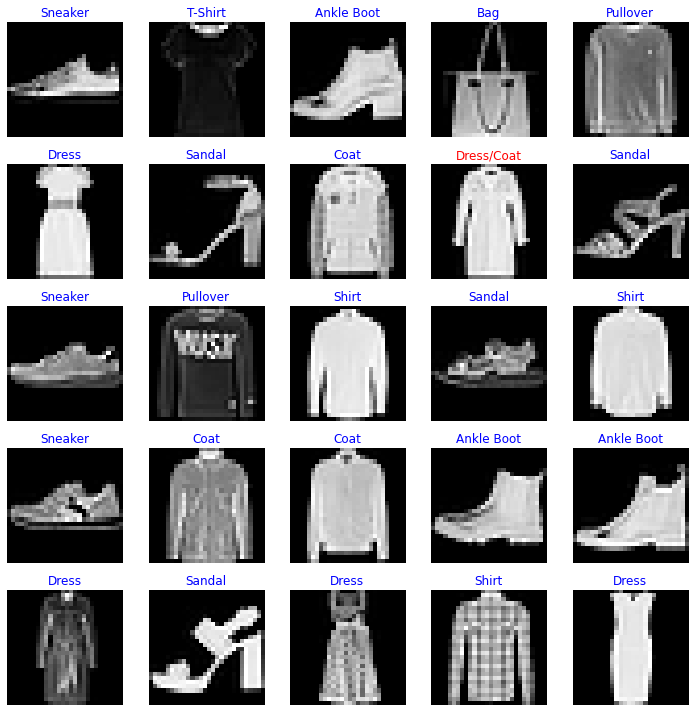

In [ ]:
test_batch_size = 25
batch_index = np.random.choice(len(X_test_cnn), size=test_batch_size, replace=False)

batch_xs = X_test_cnn[batch_index]
batch_ys = y_test_bak[batch_index]
y_pred_ = cnn_model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28), cmap='gray')
    p.axis('off')
plt.tight_layout()

## Compare MLP vs. CNN

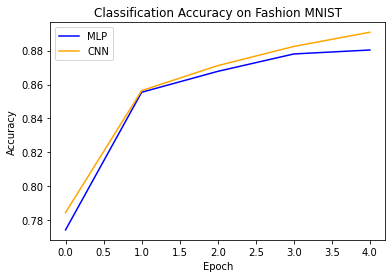

In [ ]:
from matplotlib import pyplot as plt
def compare_training(history_mlp, history_cnn):
  # plot accuracy
  plt.subplot(111)
  plt.title('Classification Accuracy on Fashion MNIST')
  plt.plot(history_mlp.history['accuracy'], color='blue', label='MLP')
  plt.plot(history_cnn.history['accuracy'], color='orange', label='CNN')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()
  return
 
compare_training(mlp_history,cnn_history)

## Saving the model 



In [ ]:
# Provided
mlp_model.save("mlp_model.h5")
cnn_model.save("cnn_model.h5")

loading

## MLP vs. CNN on Image Classification

CNNs outperforms MLPs on image classification tasks.

* MLPs (Multilayer Perceptron) use one perceptron for each input (e.g. pixel in an image) and the amount of weights rapidly becomes unmanageable for large images. It includes too many parameters because it is fully connected. Each node is connected to every other node in next and the previous layer, forming a very dense web — resulting in redundancy and inefficiency. As a result, difficulties arise whilst training and overfitting can occur which makes it lose the ability to generalize.

* Another common difference between MLPs and CNNs is that MLPs react differently to an input (images) and its shifted version — they are not translation invariant. For example, if a picture of a cat appears in the top left of the image in one picture and the bottom right of another picture, the MLP will try to correct itself and assume that a cat will always appear in this section of the image.

* Hence, compared to CNNs, MLPs are not the best idea to use for image processing. One of the main problems is that spatial information is lost when the image is flattened(matrix to vector) into an MLP. We thus utilize CNNs to leverage the spatial correlation of the image features (pixels) in such a way that we can see the cat in our picture no matter where it may appear. 


In [ ]:
from google.colab import files

files.download('cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('mlp_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>